In [118]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [119]:
#Dataset

In [120]:
x,y = make_regression(n_samples=100, n_features=1 , noise=10)
y = y + abs(y/2)

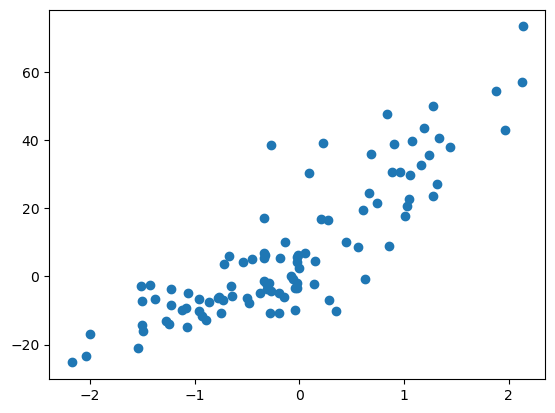

In [121]:
plt.scatter(x,y)

In [122]:
print(x.shape)
y = y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


In [123]:
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))


In [124]:
theta = np.random.randn(3,1)
print(theta)

[[ 1.45959799]
 [-0.92054083]
 [ 0.50973089]]


In [125]:
# Model

In [126]:
def model(X,theta):
    return X.dot(theta)

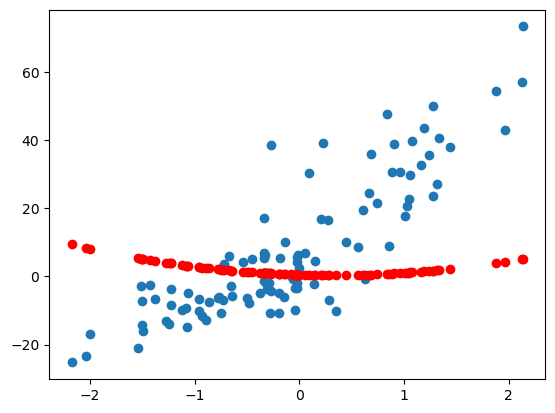

In [127]:
plt.scatter(x,y)
plt.scatter(x,model(X,theta),c='r')

In [128]:
#La fonction Cout

In [129]:
def cost_function(X,y,theta):
    m = len(y)
    return (1/2*m) * np.sum((model(X,theta) - y)**2 )

cost_function(X,y,theta)

2333850.7666074946

In [130]:
# gradient

In [131]:
def grad(X,y,theta):
    m=len(y)
    return (1/m) * X.T.dot( model(X,theta) - y )

grad(X,y,theta)

array([[ -7.89760223],
       [-16.98617338],
       [ -5.71330167]])

In [132]:
# descente de gradient

In [133]:
def grad_descent(X,y,theta,learning_rate,n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0,n_iteration):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
        
    return theta,cost_history


In [134]:
# Machine learning

In [135]:
theta_final,cost_history = grad_descent(X,y,theta,learning_rate=0.01, n_iteration=1000)

In [136]:
# Predictions

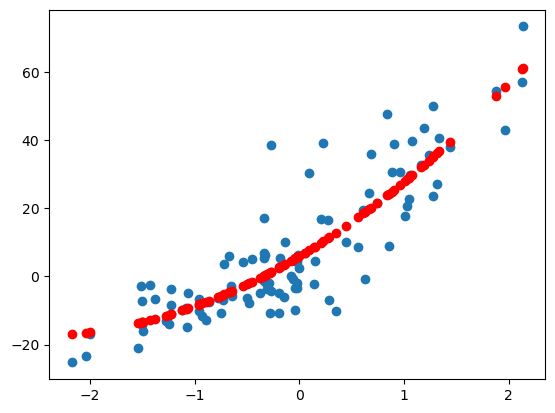

In [137]:
plt.scatter(x,y)
predictions = model(X,theta_final)
plt.scatter(x,predictions,c='r')

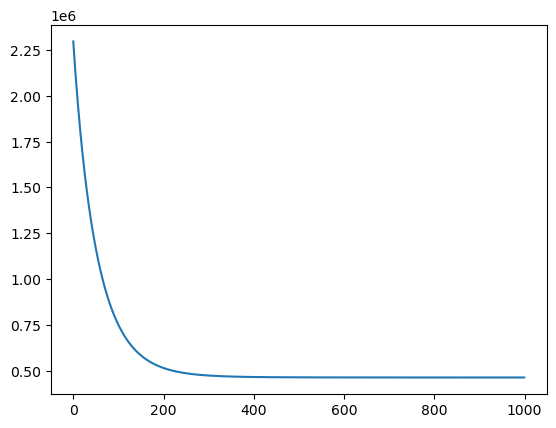

In [138]:
plt.plot(range(0,1000),cost_history)

In [116]:
# Coefition de determination

In [117]:
def coef_det(y,pred):
    u = (( y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_det(y,predictions)

0.9366110274731964